# Pomer dát 1:1

Súbor: train_1_test_1.ipynb

Program: Hospodárska informatika

Vypracovala:  Veronika Motúzová 

Bakalárska práca: Metódy hlbokého učenia pre detekciu meteorov v astronomických snímkach

Vedúci bakalárskej práce: doc. Ing. Peter Butka, PhD.

Konzultant: Ing. Viera Maslej Krešňáková

Import knižníc

In [2]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.metrics import categorical_crossentropy
from keras.layers import Conv2D, MaxPooling2D, Dropout, ZeroPadding2D
from keras.utils import np_utils, plot_model
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
import array
from sklearn.metrics import confusion_matrix,classification_report
import itertools 
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from keras.callbacks import ModelCheckpoint
from keras.models import load_model 

Načítanie dát

In [3]:
train = np.load('../data/data_final_train.npz')
test = np.load('../data/data_final_test.npz')

In [4]:
x_train = train['train_data'].reshape(train['train_data'].shape[0], 128, 128, 1)
x_test = test['test_data'].reshape(test['test_data'].shape[0], 128, 128, 1)

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [6]:
print(x_train.shape)
print(x_test.shape)

(23746, 128, 128, 1)
(23746, 128, 128, 1)


In [7]:
y_train = np_utils.to_categorical(train['train_targets'], 2)
y_test = np_utils.to_categorical(test['test_targets'], 2)

CNN

In [8]:
model = Sequential()

In [9]:
model.add(ZeroPadding2D((1,1),input_shape=(128, 128,1)))

In [10]:
model.add(Conv2D(64, 3, strides=1, activation='relu')) 

In [11]:
model.add(MaxPooling2D(3, 2))

In [12]:
model.add(Conv2D(64, 5, strides=1, padding='same', activation='relu'))

In [13]:
model.add(MaxPooling2D(3, 2))

In [14]:
model.add(Conv2D(64, 3, strides=1, padding='same', activation='relu')) 

In [15]:
model.add(Conv2D(64, 3, strides=1, padding='same', activation='relu'))

In [16]:
model.add(MaxPooling2D(3, 2))

In [17]:
model.add(Flatten())

In [18]:
model.add(Dense(96, activation='relu'))

In [19]:
model.add(Dropout(0.25)) 

In [20]:
model.add(Dense(96, activation='relu'))

In [21]:
model.add(Dropout(0.25)) 

In [22]:
model.add(Dense(2, activation='softmax'))

Adam Optimization

In [23]:
adam = Adam()

In [24]:
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

Aby sa uložil model s najlepším výsledkom:

In [25]:
saved_model = "model_1_1.hdf5"
checkpoint = ModelCheckpoint(saved_model, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [26]:
f = model.fit(x_train, y_train, epochs=15, batch_size=128, validation_data=(x_test, y_test), callbacks=[checkpoint])


Train on 23746 samples, validate on 23746 samples
Epoch 1/15
23746/23746 [==============================] - 1399s 59ms/step - loss: 0.3990 - accuracy: 0.8144 - val_loss: 0.2656 - val_accuracy: 0.8931

Epoch 00001: val_accuracy improved from -inf to 0.89308, saving model to alexnet_4.hdf5
Epoch 2/15
23746/23746 [==============================] - 1384s 58ms/step - loss: 0.2431 - accuracy: 0.9038 - val_loss: 0.2603 - val_accuracy: 0.9044

Epoch 00002: val_accuracy improved from 0.89308 to 0.90436, saving model to alexnet_4.hdf5
Epoch 3/15
23746/23746 [==============================] - 1368s 58ms/step - loss: 0.2404 - accuracy: 0.9026 - val_loss: 0.1683 - val_accuracy: 0.9373

Epoch 00003: val_accuracy improved from 0.90436 to 0.93725, saving model to alexnet_4.hdf5
Epoch 4/15
23746/23746 [==============================] - 1304s 55ms/step - loss: 0.1674 - accuracy: 0.9382 - val_loss: 0.1684 - val_accuracy: 0.9435

Epoch 00004: val_accuracy improved from 0.93725 to 0.94353, saving model to

Načítanie modelu

In [27]:
print("Loading model....")
model = load_model('model_1_1.hdf5')

Loading model....


Vyhodnotenie test loss a accuracy

In [28]:
#na trénovacej množine 
score = model.evaluate(x_train, y_train, verbose=0) 
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.03694472451417418
Test accuracy: 0.9866082668304443


In [29]:
#na testovacej množine
score1 = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

Test loss: 0.07635163621552635
Test accuracy: 0.9781015515327454


Predikcia

In [30]:
y_pred = model.predict(x_test)
prediction_int = np.zeros_like(y_pred)
prediction_int[y_pred > 0.5] = 1

Confusion Matrix

In [31]:
matrix = metrics.confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

In [32]:
print(matrix)
# TN / FN
# FP / TP

[[11818    55]
 [  465 11408]]


Classification Report

In [33]:
print(classification_report(y_test, prediction_int))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     11873
           1       1.00      0.96      0.98     11873

   micro avg       0.98      0.98      0.98     23746
   macro avg       0.98      0.98      0.98     23746
weighted avg       0.98      0.98      0.98     23746
 samples avg       0.98      0.98      0.98     23746



In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_1 (ZeroPaddin (None, 130, 130, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 63, 63, 64)        102464    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 31, 31, 64)        36928     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 31, 31, 64)       

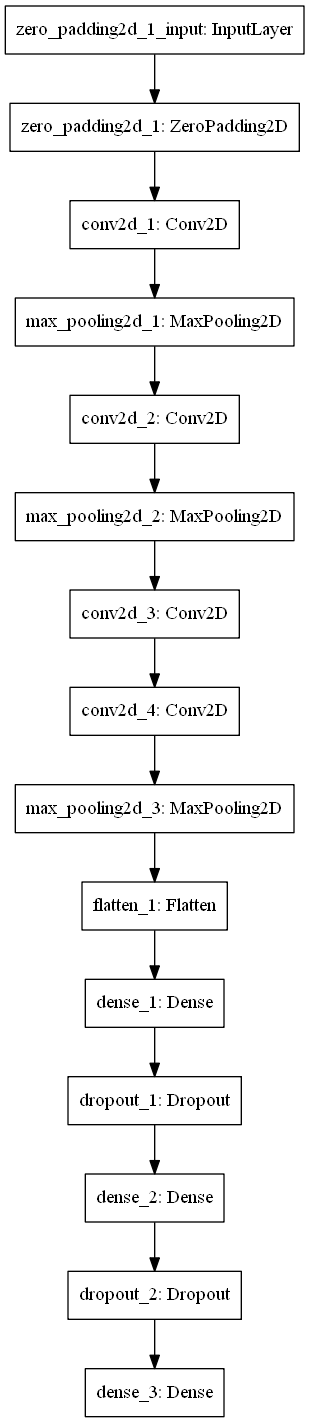

In [35]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='alexnet_4.png')

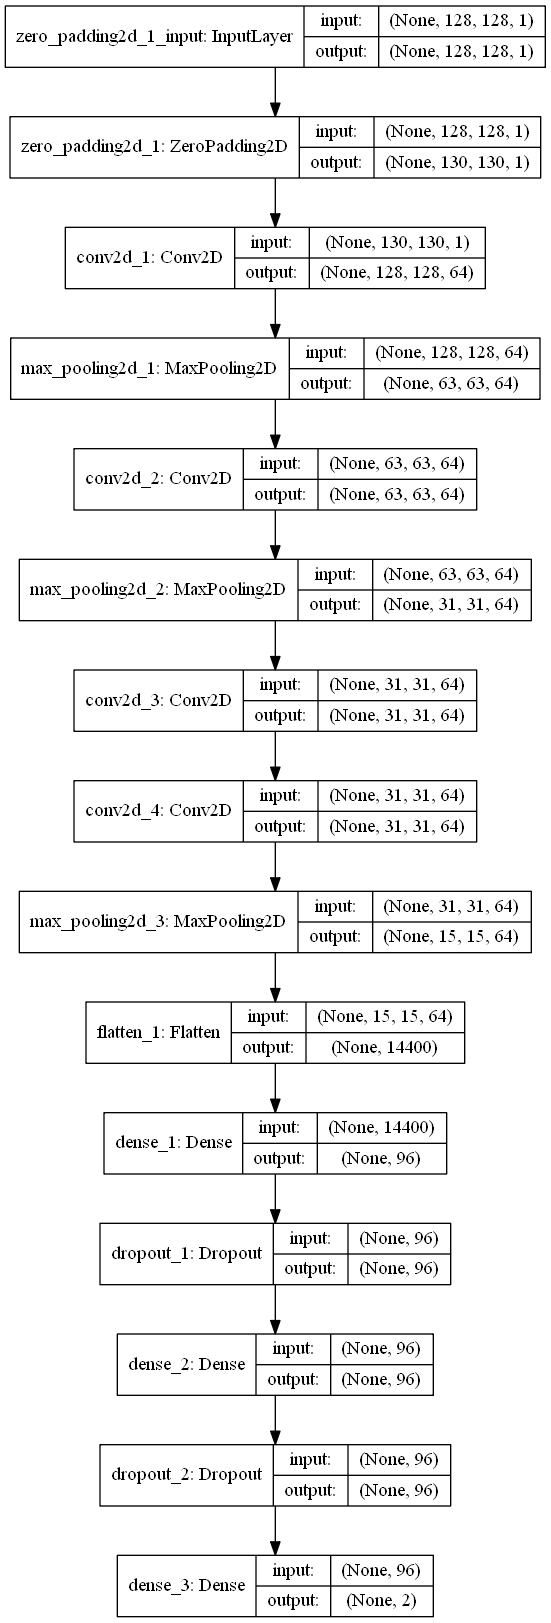

In [36]:
plot_model(model, to_file='alexnet_4_shapes.png', show_shapes=True)